# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

#Call Api key
api_key = "b5195542e5d4f645f774cd255e39fddc"
           
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

In [3]:
print(cities[:5])

['attawapiskat', 'cabo san lucas', 'bathsheba', 'saskylakh', 'geraldton']


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#Create lists for data
city_name = []
temp = []
lat = []
lng = []
humidity = []
wind_speed = []
cloudiness = []

for city in cities:
    
    try: 
        target_url = url + "appid=" + api_key + "&units=METRIC" + "&q=" + city
        city_data = requests.get(target_url).json()
        city_name.append(city_data["name"])
        temp.append(city_data["main"]["temp_max"])
        lat.append(city_data["coord"]["lat"])
        lng.append(city_data["coord"]["lon"])
        wind_speed.append(city_data["wind"]["speed"])
        humidity.append(city_data["main"]["humidity"])
        cloudiness.append(city_data["clouds"]["all"])
    except: 
        print(city + " not found")
        
    pass

attawapiskat not found
grand river south east not found
bengkulu not found
amderma not found
illoqqortoormiut not found
barentsburg not found
ngukurr not found
taolanaro not found
nizhneyansk not found
tsihombe not found
pingzhuang not found
nam tha not found
gorno-chuyskiy not found
belushya guba not found
afmadu not found
qafsah not found
umzimvubu not found
saleaula not found
kuche not found
tumannyy not found
acarau not found
barawe not found
ndele not found
krasnoselkup not found
mys shmidta not found
waw not found
marcona not found
urumqi not found
katha not found
wulanhaote not found
galiwinku not found
utiroa not found
yanan not found
kalamakion not found
bolungarvik not found
vaitupu not found
berbera not found
akyab not found
korla not found
fevralsk not found
yomitan not found
gardan diwal not found
bairiki not found
tlahuapan not found
tiruvottiyur not found
haibowan not found
ascension not found
tabiauea not found
alotau not found
grand centre not found
palabuhanratu not f

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#Create Dataframe
clean_cities_df = pd.DataFrame({'City': city_name,
                                'Temperature (F)': temp,
                                'Latitude': lat, 
                                'Longitude': lng,
                                'Humidity (%)': humidity,
                                'Cloudiness (%)': cloudiness,
                                'Wind Speed (mph)': wind_speed
                               })

clean_cities_df = clean_cities_df.reset_index()
del clean_cities_df['index']

#Show dataframe
clean_cities_df.head()
clean_cities_df.to_csv("City_Data.csv")

In [8]:
clean_cities_df.head(25)

,City,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Cabo San Lucas,26.00,22.89,-109.91,57,40,5.51
1,Bathsheba,24.00,13.22,-59.52,88,75,11.30
2,Saskylakh,-23.50,71.97,114.09,71,48,1.41
3,Geraldton,-8.00,49.72,-86.95,72,40,5.70
4,Castro,17.00,-42.48,-73.76,77,75,7.70
5,Punta Arenas,13.00,-53.16,-70.91,50,75,12.30
6,Puerto Ayora,28.00,-0.74,-90.35,51,20,8.70
7,Creston,0.60,41.06,-94.36,93,1,3.10
8,Mataura,20.85,-46.19,168.86,57,56,6.66
9,Khatanga,-20.43,71.98,102.47,82,48,1.51


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

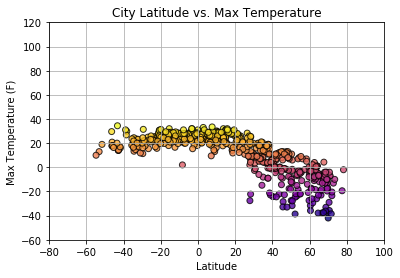

In [9]:
#Build a scatter plot for Latitude vs. Temperature
plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Temperature (F)"], c=clean_cities_df["Temperature (F)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='plasma', alpha=0.8, label="City")

# Parameters for Plot
plt.title(f"City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-60, 120])

#Save and show plot
plt.savefig("Latitude_Temperature_Plot.png")
plt.show()

#### Latitude vs. Humidity Plot

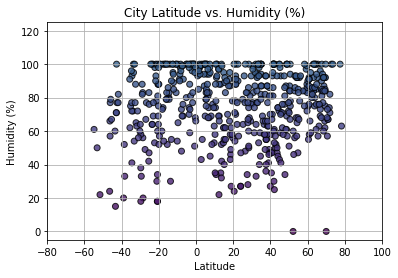

In [11]:
#Build a scatter plot for Latitude vs. Humidity (%)
plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Humidity (%)"], c=clean_cities_df["Humidity (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="City")

# Parameters for Plot
plt.title(f"City Latitude vs. Humidity (%)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-5, 125])

# Save and show plot
plt.savefig("Latitude_Humidity_Plot.png")
plt.show()

#### Latitude vs. Cloudiness Plot

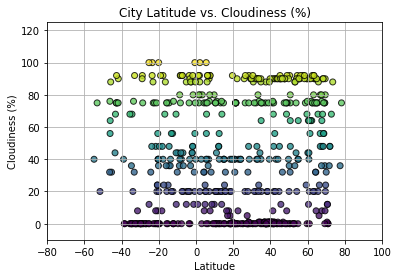

In [13]:
#Build a scatter plot for Latitude vs. Cloudiness (%)

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Cloudiness (%)"], c=clean_cities_df["Cloudiness (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="City")

# Paramters for Plot
plt.title(f"City Latitude vs. Cloudiness (%)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 125])

# Save and show plot
plt.savefig("Latitude_Cloudiness_Plot.png")
plt.show()

#### Latitude vs. Wind Speed Plot

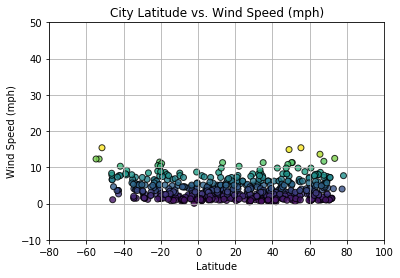

In [14]:
#Build a scatter plot for Latitude vs. Wind Speed (mph)

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Wind Speed (mph)"], c=clean_cities_df["Wind Speed (mph)"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="City")

# Parameters for Plot
plt.title(f"City Latitude vs. Wind Speed (mph)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 50])

# Save and show plot
plt.savefig("Latitude_WindSpeed_Plot.png")
plt.show()